Income Qualification
Course-end Project 2
Description

Identify the level of income qualification needed for the families in Latin America.

Problem Statement Scenario:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.
Following actions should be performed:

Identify the output variable.

Understand the type of data.

Check if there are any biases in your dataset.

Check whether all members of the house have the same poverty level.

Check if there is a house without a family head.

Set poverty level of the members and the head of the house within a family.

Count how many null values are existing in columns.

Remove null value rows of the target variable.

Predict the accuracy using random forest classifier.

Check the accuracy using random forest with cross validation.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds_train = pd.read_csv('IQualificationtrain.csv')
ds_test = pd.read_csv('IQualificationtest.csv')

In [3]:
ds_train.head(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,...,121,1444,16,121,4,1.777778,1.0,121.0,1444,4
6,ID_e9e0c1100,180000.0,0,5,0,1,1,1,1.0,0,...,4,64,16,121,4,1.777778,1.0,121.0,64,4
7,ID_3e04e571e,130000.0,1,2,0,1,1,0,NaN,0,...,0,49,16,81,4,16.000000,1.0,100.0,49,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,...,81,900,16,81,4,16.000000,1.0,100.0,900,4
9,ID_51f52fdd2,130000.0,1,2,0,1,1,0,NaN,0,...,121,784,16,81,4,16.000000,1.0,100.0,784,4


### The data set contains a column named "Target" which is likely to contain the levels of income qualification
This is our output variable in the given dataset

In [4]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
ds_train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [6]:
ds_train.shape

(9557, 143)

given that the data is collected from Latin American region, it is safe to assume that the column names are in latin or spanish
This may not be important for the analysis but it will help us analyse the dataset effectively

In [7]:
ds_train.isnull().any(axis=1)

0        True
1        True
2        True
3       False
4        True
        ...  
9552     True
9553     True
9554     True
9555     True
9556     True
Length: 9557, dtype: bool

#### Let's understand what atte the various kinds of data we have in the dataset

In [8]:
print("integer type ")
print(ds_train.select_dtypes(np.int64).columns)#df_income_train.select_dtypes(np.int64).columns

integer type 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


In [9]:
print('object type')
print(ds_train.select_dtypes(object).columns)

object type
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [10]:
print('Float type')
print(ds_train.select_dtypes(np.float64).columns)

Float type
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


So we have some columns of integer type, some columns of object type and some of float type
all of it contains few numerical and few categorical information 
The dataset have some missing values as well. So let's treat the missing values first and then we will study the columns and related columns in more detail

In [11]:
ds_train.select_dtypes(np.int64).head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4


In [12]:
null_cols = ds_train.select_dtypes('int64').isnull().sum()

In [13]:
print(null_cols)

hacdor            0
rooms             0
hacapo            0
v14a              0
refrig            0
                 ..
SQBhogar_total    0
SQBedjefe         0
SQBhogar_nin      0
agesq             0
Target            0
Length: 130, dtype: int64


In [14]:
ds_train['Target']

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64

No null values in int64 type of columns

In [15]:
null_cols1 = ds_train.select_dtypes('float64').isnull().sum()
print(null_cols1)

v2a1               6860
v18q1              7342
rez_esc            7928
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64


float64 type of columns have null values, v2a1 have 6860, v18q1 have 7342, meaneduc have 5 and SQBmeaned have 5 null values

In [16]:
null_cols2 = ds_train.select_dtypes('object').isnull().sum()
null_cols2[null_cols2>0]
print(null_cols2)

Id            0
idhogar       0
dependency    0
edjefe        0
edjefa        0
dtype: int64


no null values found in the object type columns

In [17]:
ds_train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


here we can see that object type columns have mixed values (categorical and numerical)

#### Data cleaning step1 - clean the columns with mixed values

LEt's fix it by replacing yes with 1 and no with 0

In [18]:
map_dict = {'yes':1, 'no':0}
for x in [ds_train, ds_test]:
    ds_train['dependency']=ds_train['dependency'].replace(map_dict).astype(np.float64)
    ds_train['edjefe']= ds_train['edjefe'].replace(map_dict).astype(np.float64)
    ds_train['edjefa']= ds_train['edjefa'].replace(map_dict).astype(np.float64)
    ds_test['dependency']=ds_test['dependency'].replace(map_dict).astype(np.float64)
    ds_test['edjefe']= ds_test['edjefe'].replace(map_dict).astype(np.float64)
    ds_test['edjefa']= ds_test['edjefa'].replace(map_dict).astype(np.float64)
print(ds_train[['dependency', 'edjefe','edjefa' ]])
print(ds_test[['dependency','edjefe','edjefa' ]])


      dependency  edjefe  edjefa
0           0.00    10.0     0.0
1           8.00    12.0     0.0
2           8.00     0.0    11.0
3           1.00    11.0     0.0
4           1.00    11.0     0.0
...          ...     ...     ...
9552        0.25     9.0     0.0
9553        0.25     9.0     0.0
9554        0.25     9.0     0.0
9555        0.25     9.0     0.0
9556        0.25     9.0     0.0

[9557 rows x 3 columns]
       dependency  edjefe  edjefa
0             0.5     0.0    17.0
1             0.5     0.0    17.0
2             0.5     0.0    17.0
3             0.0    16.0     0.0
4             8.0     0.0    11.0
...           ...     ...     ...
23851         0.5     5.0     0.0
23852         1.0     6.0     0.0
23853         1.0     6.0     0.0
23854         1.0     6.0     0.0
23855         1.0     6.0     0.0

[23856 rows x 3 columns]


#### Data cleaning step2 - manipulate the missing values in the dataset

In [19]:
ds_train[['dependency', 'edjefe', 'edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


now lets fix the null values columns (float64 types). float64 type of columns have null values, v2a1 have 6860, v18q1 have 7342, meaneduc have 5 and SQBmeaned have 5 null values


First we need to analyse each column with null value and understand does it have null values, whether or not it can be treated

Accoding to the data disctionary - v2a1 is monthly rent payment , and there are other columns which shows the status of owning / renting house, so let's do a combined analysis

In [20]:
data = ds_train[ds_train['v2a1'].isnull()]
data

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
13,ID_064b57869,NaN,0,4,0,1,1,1,1.0,0,...,16,6241,4,0,0,1.000000,1.0000,90.2500,6241,4
14,ID_5c837d8a4,NaN,0,4,0,1,1,1,1.0,0,...,225,1521,4,0,0,1.000000,1.0000,90.2500,1521,4
26,ID_e5cdba865,NaN,0,5,0,1,1,0,NaN,0,...,225,1936,1,225,0,0.250000,0.0000,225.0000,1936,4
32,ID_e24d9c3c9,NaN,0,5,0,1,1,0,NaN,0,...,1,784,25,121,1,2.777778,0.0625,27.5625,784,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9542,ID_fc386a944,NaN,0,3,0,0,0,0,NaN,2,...,9,100,25,4,9,6.250000,2.2500,16.0000,100,2
9543,ID_2f8268634,NaN,0,3,0,0,0,0,NaN,2,...,36,169,25,4,9,6.250000,2.2500,16.0000,169,2
9544,ID_4c180d79f,NaN,0,3,0,0,0,0,NaN,2,...,36,1089,25,4,9,6.250000,2.2500,16.0000,1089,2
9550,ID_90a399a51,NaN,0,3,0,1,1,0,NaN,0,...,36,3721,4,0,0,4.000000,1.0000,9.0000,3721,2


This sums up all the NAN values in v2a1 column. Now let's sort it with the house/rent related columns

In [21]:
data[['tipovivi1', 'tipovivi2' , 'tipovivi3', 'tipovivi4', 'tipovivi5']]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0
...,...,...,...,...,...
9542,1,0,0,0,0
9543,1,0,0,0,0
9544,1,0,0,0,0
9550,1,0,0,0,0


based on this result we can conclude that all the places where v2a1 column has NAN value, those entries belongs to people who have a fully paid house, to be sure let's plot a bar chart which indicates the number of missing values in v2a1(missing rent ) and tipovivi1/2/3/4/5 variables

In [22]:
owns_home = ds_train['v2a1'].isnull().sum()
owns_home

6860

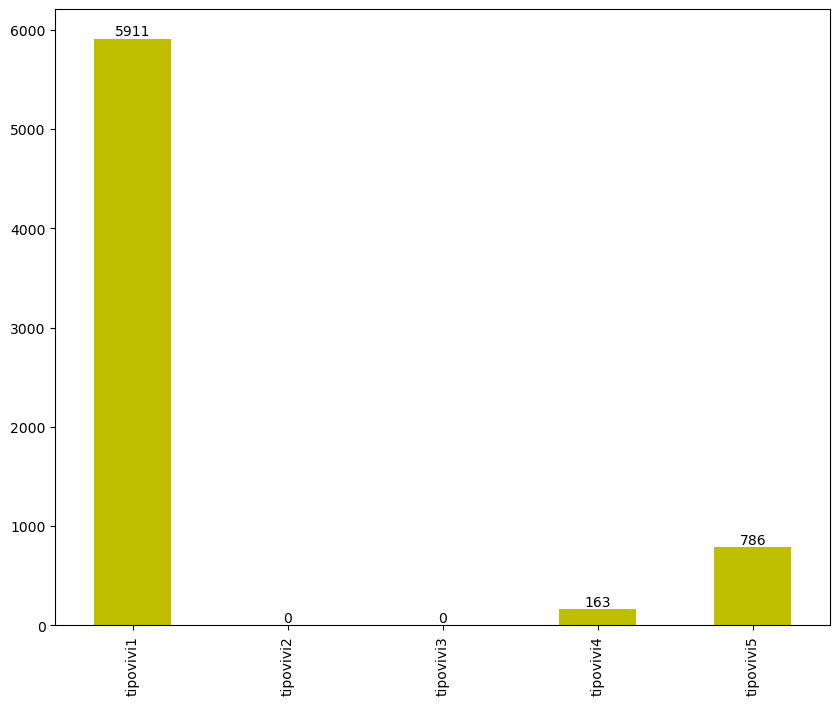

In [23]:
rent_stat_home_status = ['tipovivi1', 'tipovivi2' , 'tipovivi3', 'tipovivi4', 'tipovivi5']
ax=ds_train.loc[ds_train['v2a1'].isnull(), rent_stat_home_status].sum().plot.bar(figsize=(10,8), color='y', linewidth=2);

for label in ax.containers:
    ax.bar_label(label)

Now that we know that for 'v2a1' set to null, one of the 'tipovivi1' 'tipovivi4' or 'tipovivi5' is 1 ,
Also the sum of tipovivi1, tipovivi4 and tipovivi5 is  5911+163+786 = 6860, which is the total null values in v2a1 column
So we can conclude that if house is fully paid or precarious(dependent) or borrowed then there will not be any monthly payment

In [24]:
#lets add 0 to all the null values in v2a1 column
for df in [ds_train, ds_test]:
    df['v2a1'].fillna(value=0, inplace=True)
    
print('number of null values in "v2a1" column in train data:')
print(ds_train['v2a1'].isnull().sum())
print('number of null values in "v2a1" column in test data:')
print(ds_test['v2a1'].isnull().sum())


number of null values in "v2a1" column in train data:
0
number of null values in "v2a1" column in test data:
0


now let's look at the next column with null values in it "v18q1" this column represents "number of tablets household owns" 
We also have another related column "v18q" which represents if the house "owns a tablet or not", theoretically number of tablets will only come into picture if the household owns any tablet, if not the number can be set to 0, so let's confirm our theory

In [25]:
ds_train['v18q1'].isnull().sum()

7342

let's find out how many families owns tablets and how many does not

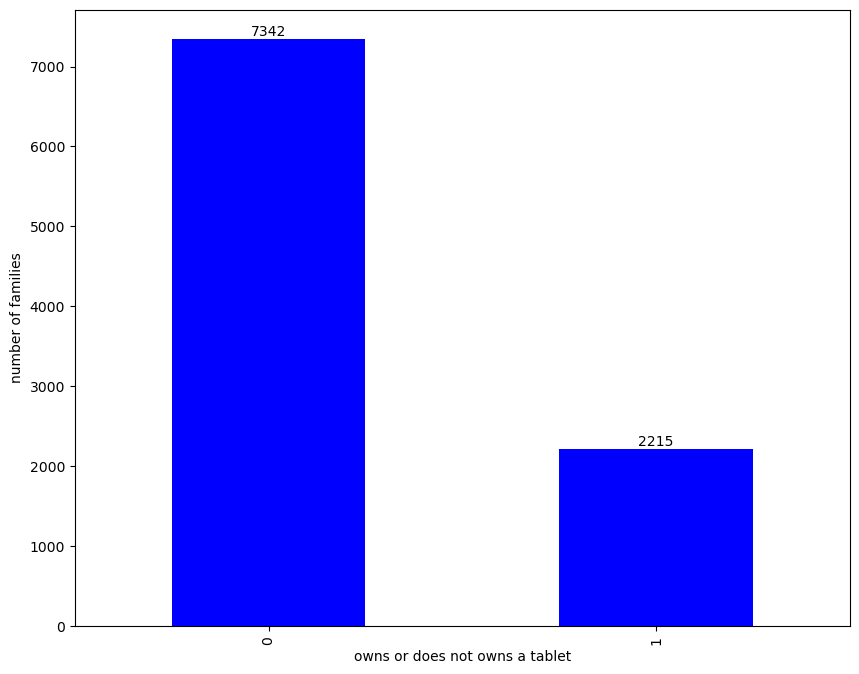

In [26]:
ax=ds_train['v18q'].value_counts().plot.bar(figsize=(10,8), color = 'blue', linewidth=2)
plt.xlabel("owns or does not owns a tablet")
plt.ylabel("number of families")
for label in ax.containers:
    ax.bar_label(label)


Based on this plot we can say that there are 774 failies which owns a tablet and remaining families have 0 tablets.

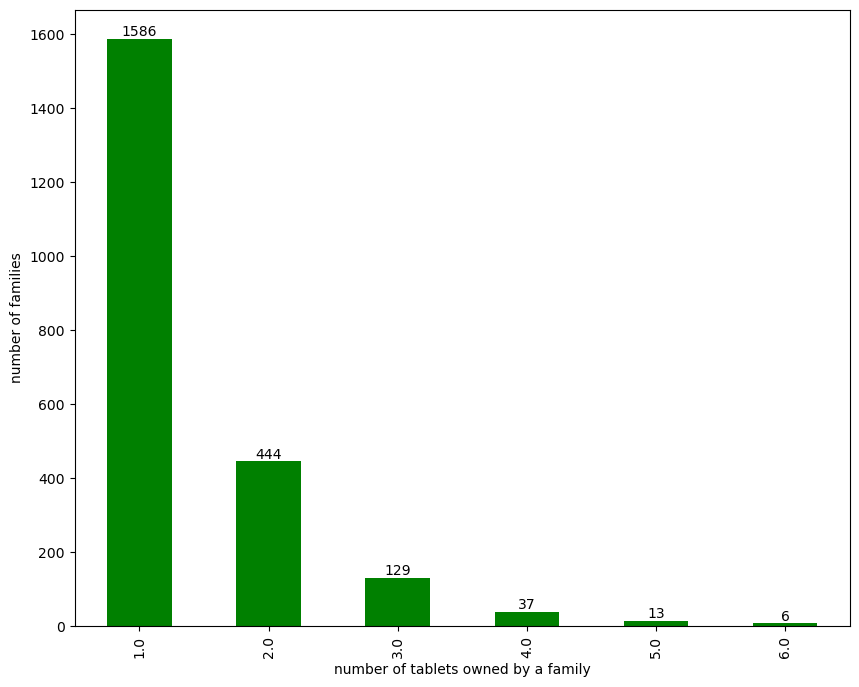

In [27]:
ax = ds_train['v18q1'].value_counts().plot.bar(figsize=(10, 8), color='g', linewidth=2)
plt.xlabel("number of tablets owned by a family")
plt.ylabel("number of families")
for label in ax.containers:
    ax.bar_label(label)

total number of households which has 1 or more tablets is 547+131+76+20 which is 774, which is same as the number of families which owns tablets in above plot. That means all the families which has tablets are already accounted for, and the en=mplty columns denote no tablets in family, So we can assign 0 to the null values in column "v18q1"

In [28]:
for df in [ds_train, ds_test]:
    df['v18q1'].fillna(value=0, inplace=True)
print(ds_train['v18q1'].isnull().sum())
print(ds_test['v18q1'].isnull().sum())

0
0


Next we have a column named "rez_esc" which has null values. the column represents "Years behind in school". First let's analyze what is the normal age range for kids who are in school

In [29]:
ds_train['rez_esc'].isnull().sum()

7928

In [30]:
#pd.set_option('display.max_rows',  9557)

In [31]:
not_null_in_rez_esc = ds_train[ds_train['rez_esc'].notnull()]['age']
print("max age:",not_null_in_rez_esc.max())
print("min age:",not_null_in_rez_esc.min())
not_null_in_rez_esc

max age: 17
min age: 7


3       17
6        8
7        7
10      11
38      15
        ..
9516    12
9533    17
9536     8
9542    10
9543    13
Name: age, Length: 1629, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

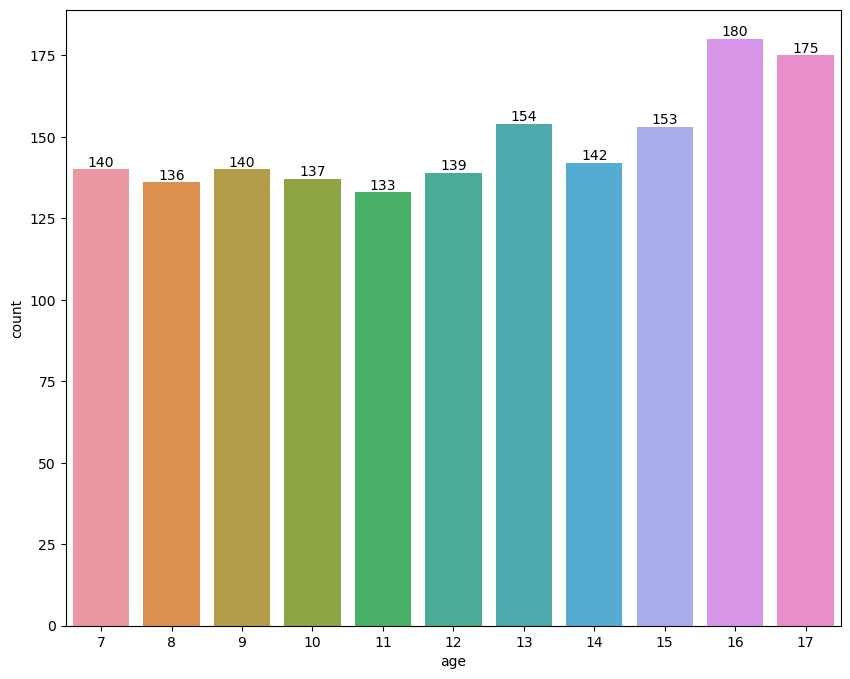

In [32]:
import seaborn as sns
plt.figure(figsize=(10,8))
ax= sns.countplot(x=not_null_in_rez_esc)
for label in ax.containers:
    ax.bar_label(label)
plt.show

by analysing the not null values in column 'rez_esc' with rest to age we see that maximum age where value is not null is 17 and minimum is 0(this is clearly wrongly classified because there cannot be a person with 0 age and still enrolled in schools)
so for manipulating the missing values in in 'rez_esc' column we can assign it 0 for age above 17
also we know that min age 0 is not correct so we should take the next value that is 7 . any age below 7 would not have started schooling, so we can assign 0 to those as well.

Theoretically if the age is less than prescool age(7), behind in school column being empty would not make sence , so it can be null.

<function matplotlib.pyplot.show(close=None, block=None)>

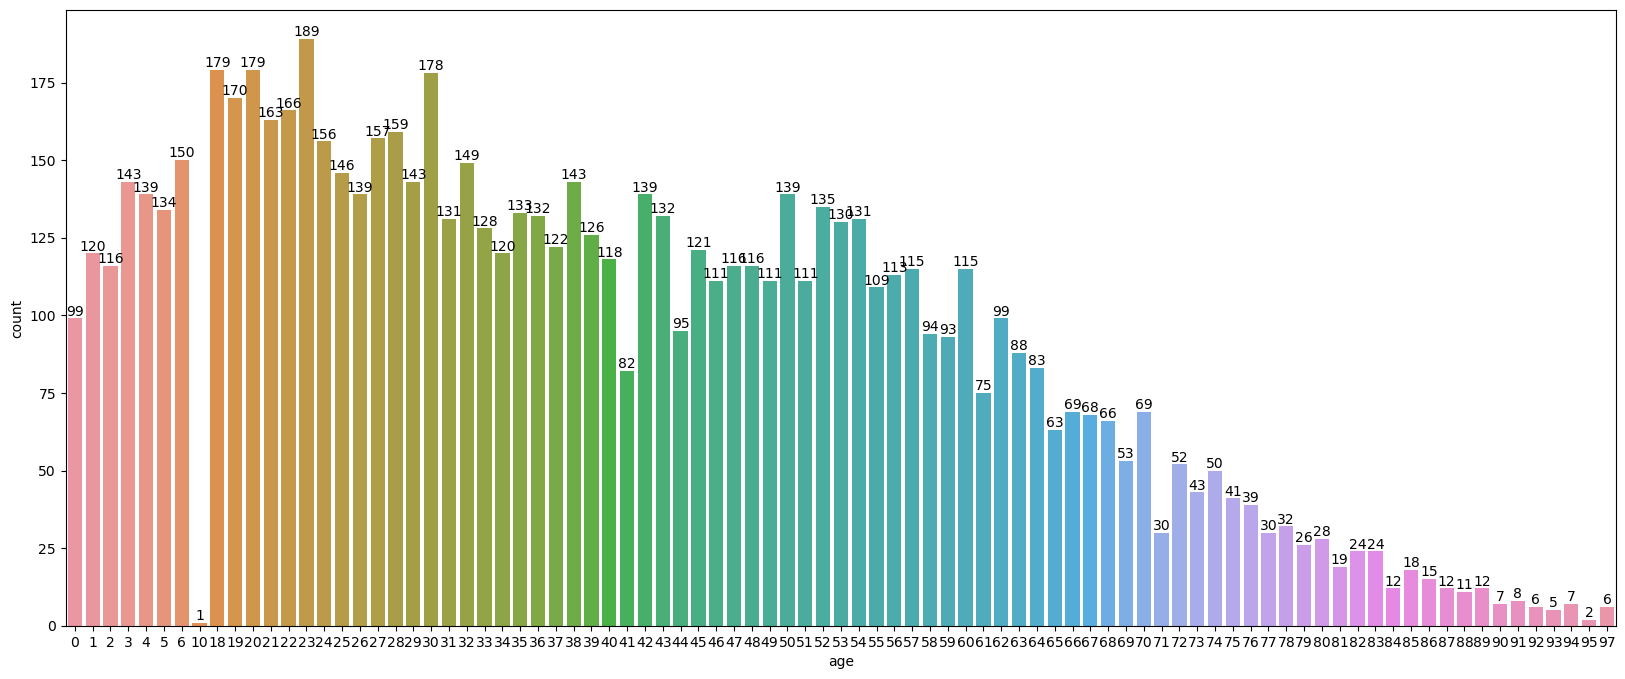

In [33]:
rez_esc_null = ds_train[ds_train['rez_esc'].isnull()]['age']
plt.figure(figsize=(20,8))
ax=sns.countplot(x=rez_esc_null)
for label in ax.containers:
    ax.bar_label(label)
plt.show

from the above plot we can see that all the missing values (except 1 for age 10) are either in age range below 7 or age range above 17, so we can assign these missing values with 0, and since 1 row will not make much impact in a set of 9577 rows (age 10 falling behind in school), let's make that also 0 for ease, or we can also drop that row since it is not going to impact the overall data behavior. For now I have decided to assign 0 to that row as well

In [34]:
for df in [ds_train, ds_test]:
    df['rez_esc'].fillna(value=0, inplace=True)
print(ds_train['rez_esc'].isnull().sum())
print(ds_test['rez_esc'].isnull().sum())

0
0


let's check if we still have some null values in dataset

In [35]:
null_cols1 = ds_train.select_dtypes('float64').isnull().sum()
print(null_cols1)

v2a1               0
v18q1              0
rez_esc            0
dependency         0
edjefe             0
edjefa             0
meaneduc           5
overcrowding       0
SQBovercrowding    0
SQBdependency      0
SQBmeaned          5
dtype: int64


now all of our float64 columns with missing values we have 2 more columns "meaneduc" and "SQBmeaned" which has 5 missing values
let's treat the missing values in "meaneduc"

"meaneduc represents average years of eduction for audlts (age 18+), let's look at the rows which has missing values in column 'meaneduc'

In [36]:
pd.set_option('display.max_columns', 1000)
#pd.set_option('display.max_rows',  9557)
avg_edu_adult = ds_train[ds_train['meaneduc'].isnull()] #only 5 items should be listed here
avg_edu_adult

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
1291,ID_bd8e11b0f,0.0,0,7,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,10,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1b31fd159,1,0,0,1,8.0,0.0,10.0,NaN,0,0,0,1,0,0,0,0,0,5,0.2,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,18,100,324,1,0,1,0.04,64.0,NaN,324,4
1840,ID_46ff87316,110000.0,0,1,0,1,1,0,0.0,0,1,1,0,1,1,0,2,2,2,2,6,0.0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,a874b7ce7,2,0,0,2,8.0,4.0,0.0,NaN,0,0,1,0,0,0,0,0,0,1,2.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,18,36,324,4,16,4,4.00,64.0,NaN,324,4
1841,ID_69f50bf3e,110000.0,0,1,0,1,1,0,0.0,0,1,1,0,1,1,0,2,2,2,2,4,0.0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,a874b7ce7,2,0,0,2,8.0,4.0,0.0,NaN,0,1,0,0,0,0,0,0,0,1,2.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,18,16,324,4,16,4,4.00,64.0,NaN,324,4
2049,ID_db3168f9f,180000.0,0,3,0,1,1,0,0.0,0,2,2,0,0,0,0,2,2,2,2,12,0.0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,faaebf71a,2,0,0,2,8.0,12.0,0.0,NaN,0,0,0,0,0,0,1,0,0,2,1.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,144,361,4,144,4,1.00,64.0,NaN,361,4
2050,ID_2a7615902,180000.0,0,3,0,1,1,0,0.0,0,2,2,0,0,0,0,2,2,2,2,12,0.0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,faaebf71a,2,0,0,2,8.0,12.0,0.0,NaN,0,0,0,0,0,0,1,0,0,2,1.0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,144,361,4,144,4,1.00,64.0,NaN,361,4


since 'meaneduc' is a column related to education level, let us analyse it with the columns which represent levels of education - instlevel1, instlevel2, instlevel3, instlevel4, instlevel5, instlevel6, instlevel7, instlevel8, instlevel9

In [37]:
col_req = ['meaneduc','instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9']

avg_edu_adult[col_req]

,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
1291,NaN,0,0,0,1,0,0,0,0,0
1840,NaN,0,0,1,0,0,0,0,0,0
1841,NaN,0,1,0,0,0,0,0,0,0
2049,NaN,0,0,0,0,0,0,1,0,0
2050,NaN,0,0,0,0,0,0,1,0,0


From the above table we can see that every time where 'meaneduc' is NAN, the 'instlevel1' which indicates no level of education,  is set to 0 that means that all of these 5 rows people have some level of education. looking at the next columns we see that first entry (NAN) has instlevel4 as 1 that means "incomplete secondary level academic", 2nd entry belongs to "instlevel3" that means primary education is complete, 3rd entry belongs to instlevel2, that means primary education is incomplete, 4th and 5th entry belongs  instlevel7 , that means technical secondary level education is complete"

In [38]:
mean_inst1 = ds_train[ds_train['instlevel4']==1]
mean_inst1 = mean_inst1['meaneduc'].mean()
print(mean_inst1)
mean_inst2 = ds_train[ds_train['instlevel3']==1]
mean_inst2 = mean_inst2['meaneduc'].mean()
print(mean_inst2)
mean_inst3 = ds_train[ds_train['instlevel2']==1]
mean_inst3 = mean_inst3['meaneduc'].mean()
print(mean_inst3)
mean_inst4 = ds_train[ds_train['instlevel7']>0]
mean_inst4 = mean_inst4['meaneduc'].mean()
print(mean_inst4)

9.33303845601355
7.52692951517137
6.838546870165746
11.947027855782313


In [39]:
ds_train.at[1291,'meaneduc']=9.33303845601355
ds_train.at[1840,'meaneduc']=7.52692951517137
ds_train.at[1841,'meaneduc']=6.838546870165746
ds_train.at[2049,'meaneduc']=11.947027855782313
ds_train.at[2050,'meaneduc']=11.947027855782313

In [40]:
print("total number of missing values in test dataset for column 'meaneduc' is:",ds_test['meaneduc'].isnull().sum())
ds_test['meaneduc'].mean()

total number of missing values in test dataset for column 'meaneduc' is: 31


9.157474336917943

In [41]:
ds_test['meaneduc'].fillna(value=9.157474336917943, inplace=True) #test dataset values imputed
ds_test['meaneduc'].isnull().sum() #checking again if everything is filled or not

0

### Let's study the dataset again

observations:
1. there are columnns like 'ID' and "idhogar" which are unique identifiers but does not hold any useful information which can contribute to our analysis. We can drop them at the end 
2. there are several columns which represents similar information for example, [area1, area2], [Male, Female], all the squared columns (just the squared values of another column), we can eventually drop them or merge them to remove redundency
3. size of the household is represendted by various colums -> 
    
    'tamhog'- size of the household, 
    
    'hhsize'- household size, 
    
    'r4t3'- Total persons in the household, 
    
    'tamviv'- number of persons living in the household,
these columns basically provide the same information, and possibly these all would be correlated, all of these can be dropped except one. But first we should check their correlation



In [42]:
print("shape of the training data before dropping columns is :",ds_train.shape)
print("shape of the test data before dropping columns is :",ds_test.shape)
cols_to_Drop = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
for df in [ds_train, ds_test]:
    df.drop(columns = cols_to_Drop, inplace=True)    
   

print("shape of the training data after dropping columns is :",ds_train.shape)
print("shape of the test data after dropping columns is :",ds_test.shape)

shape of the training data before dropping columns is : (9557, 143)
shape of the test data before dropping columns is : (23856, 142)
shape of the training data after dropping columns is : (9557, 134)
shape of the test data after dropping columns is : (23856, 133)


now the dataset is clean . we have imputaed missing values, removed unnessesary columns (ID columns are yet to be removed)

### is there any bias in the dataset?
for analysing the bias let us concentrate on "Target" colum and see if all levels of targets have similar count/distribution

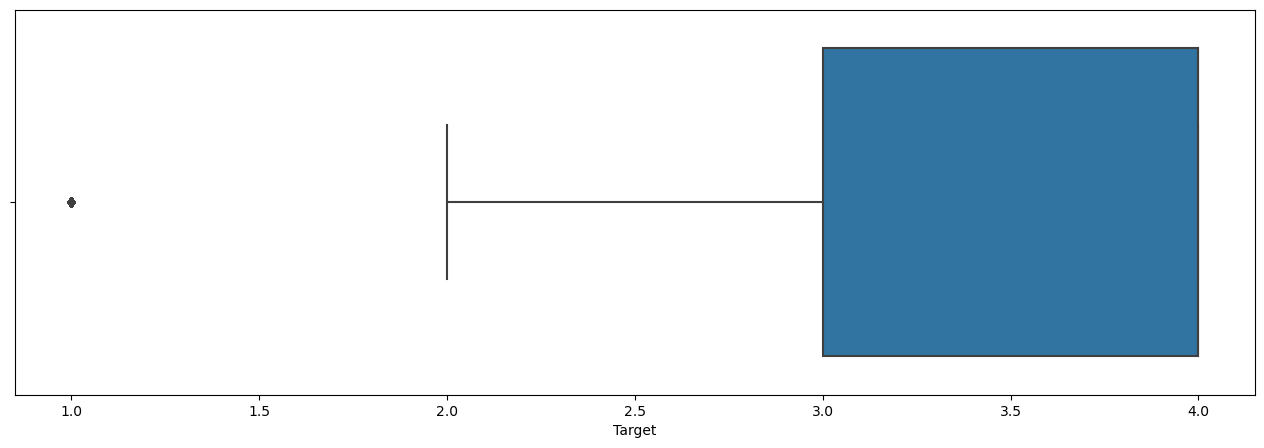

In [43]:
plt.figure(figsize = (16,5))
box = sns.boxplot(x = ds_train.Target)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

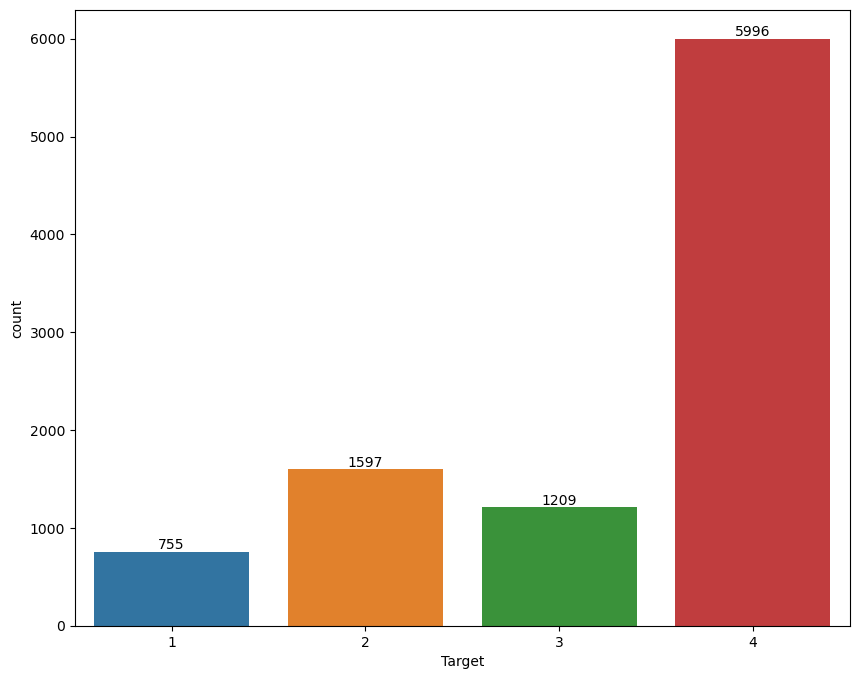

In [44]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x=ds_train['Target'])
for label in ax.containers:
    ax.bar_label(label)
plt.show

### so we can say with certainity that the given dataset is biased and unbalanced, 
there is a huge gap between the count of level1 and level4 

### -> poverty level of all the members in the family is same?

In [45]:
ds_train['idhogar'].unique().shape

(2988,)

we have total 5997 rows, but we have unique "idhogar" only 2988, that means that there are multiple  rows which belongs to same family

In [46]:
# Group by 'idhogar' and check if all 'Target' values within each group are the same
unique_idfamily = ds_train['idhogar'].unique()
unique_idfamily

array(['21eb7fcc1', '0e5d7a658', '2c7317ea8', ..., 'a8eeafc29',
       '212db6f6c', 'd6c086aa3'], dtype=object)

In [47]:
count = 0
n_diff = 0
familyID_with_diff_Pov_Lvl = pd.DataFrame(columns=['idhogar'])
for idhogar in unique_idfamily:
    group = ds_train[ds_train['idhogar'] == idhogar]
    if group['Target'].nunique() == 1:
        #print(f" family ID '{idhogar}' has all 'Target' values the same: {group['Target'].iloc[0]}")
        count = count +1
    else:
        #print(f"family ID '{idhogar}' has different poverty levels")
        familyID_with_diff_Pov_Lvl = familyID_with_diff_Pov_Lvl.append({'idhogar': idhogar}, ignore_index=True)
        n_diff = n_diff+1
print("total number of families which has same poverty level: ", count)
print("total number of families which has different poverty level:",n_diff)
familyID_with_diff_Pov_Lvl


total number of families which has same poverty level:  2903
total number of families which has different poverty level: 85


,idhogar
0,4b6077882
1,6833ac5dc
2,43b9c83e5
3,5c3f7725d
4,0f9494d3a
...,...
80,cc971b690
81,7e9d58c5c
82,e235a4eec
83,c7ce4e30c


#### Based on the results here we can see that there are 85 families which has multiple level of poverty amongst its family members
This appears to be incorrect, but since target is our output vairable, we should not change it, or try to fix this anomaly

### check if there is a house without family head?

column "parentesco1" would be set to 1 if the row contails details about the head of the family. and "idhogar" represents the unique ID for any family. 
To undertsnad that the family has a head member or not, we sould study each of the unique family ID group

In [48]:
head_of_family = ds_train.groupby('idhogar')['parentesco1'].sum()
print("shape of head_of_family:",head_of_family.shape)

shape of head_of_family: (2988,)


In [49]:
count_family_without_head = 0
for idhogar in range(0, 2988):
    value1 = head_of_family[idhogar]
    if(value1 == 0):
        count_family_without_head = count_family_without_head +1
    idhogar = idhogar+1
print("number of family without head is:",count_family_without_head)


number of family without head is: 15


#### So there are 15 families without a head member

### Set the poverty level for the members and head of the house within famiy

now we need to create a new column which will indicate the level of poverty of each members and head of the house
So the last row "Target" is the level of poverty, it has values 1/2/3/4 so we can consider 1 and 2 as below poverty, 3 and 4 as above poverty 

In [50]:
count_below_poverty= 0
count_above_poverty = 0
for target in ds_train['Target']:
    if(target in (1,2)):
        count_below_poverty = count_below_poverty+1
    elif(target in (3,4)):
        count_above_poverty = count_above_poverty+1

print("no of people below poverty line:", count_below_poverty)
print("no of people above poverty line:",count_above_poverty)
    

no of people below poverty line: 2352
no of people above poverty line: 7205


#### Now let's study the columns which are correlated and keep only one of those in the main dataset for compactness

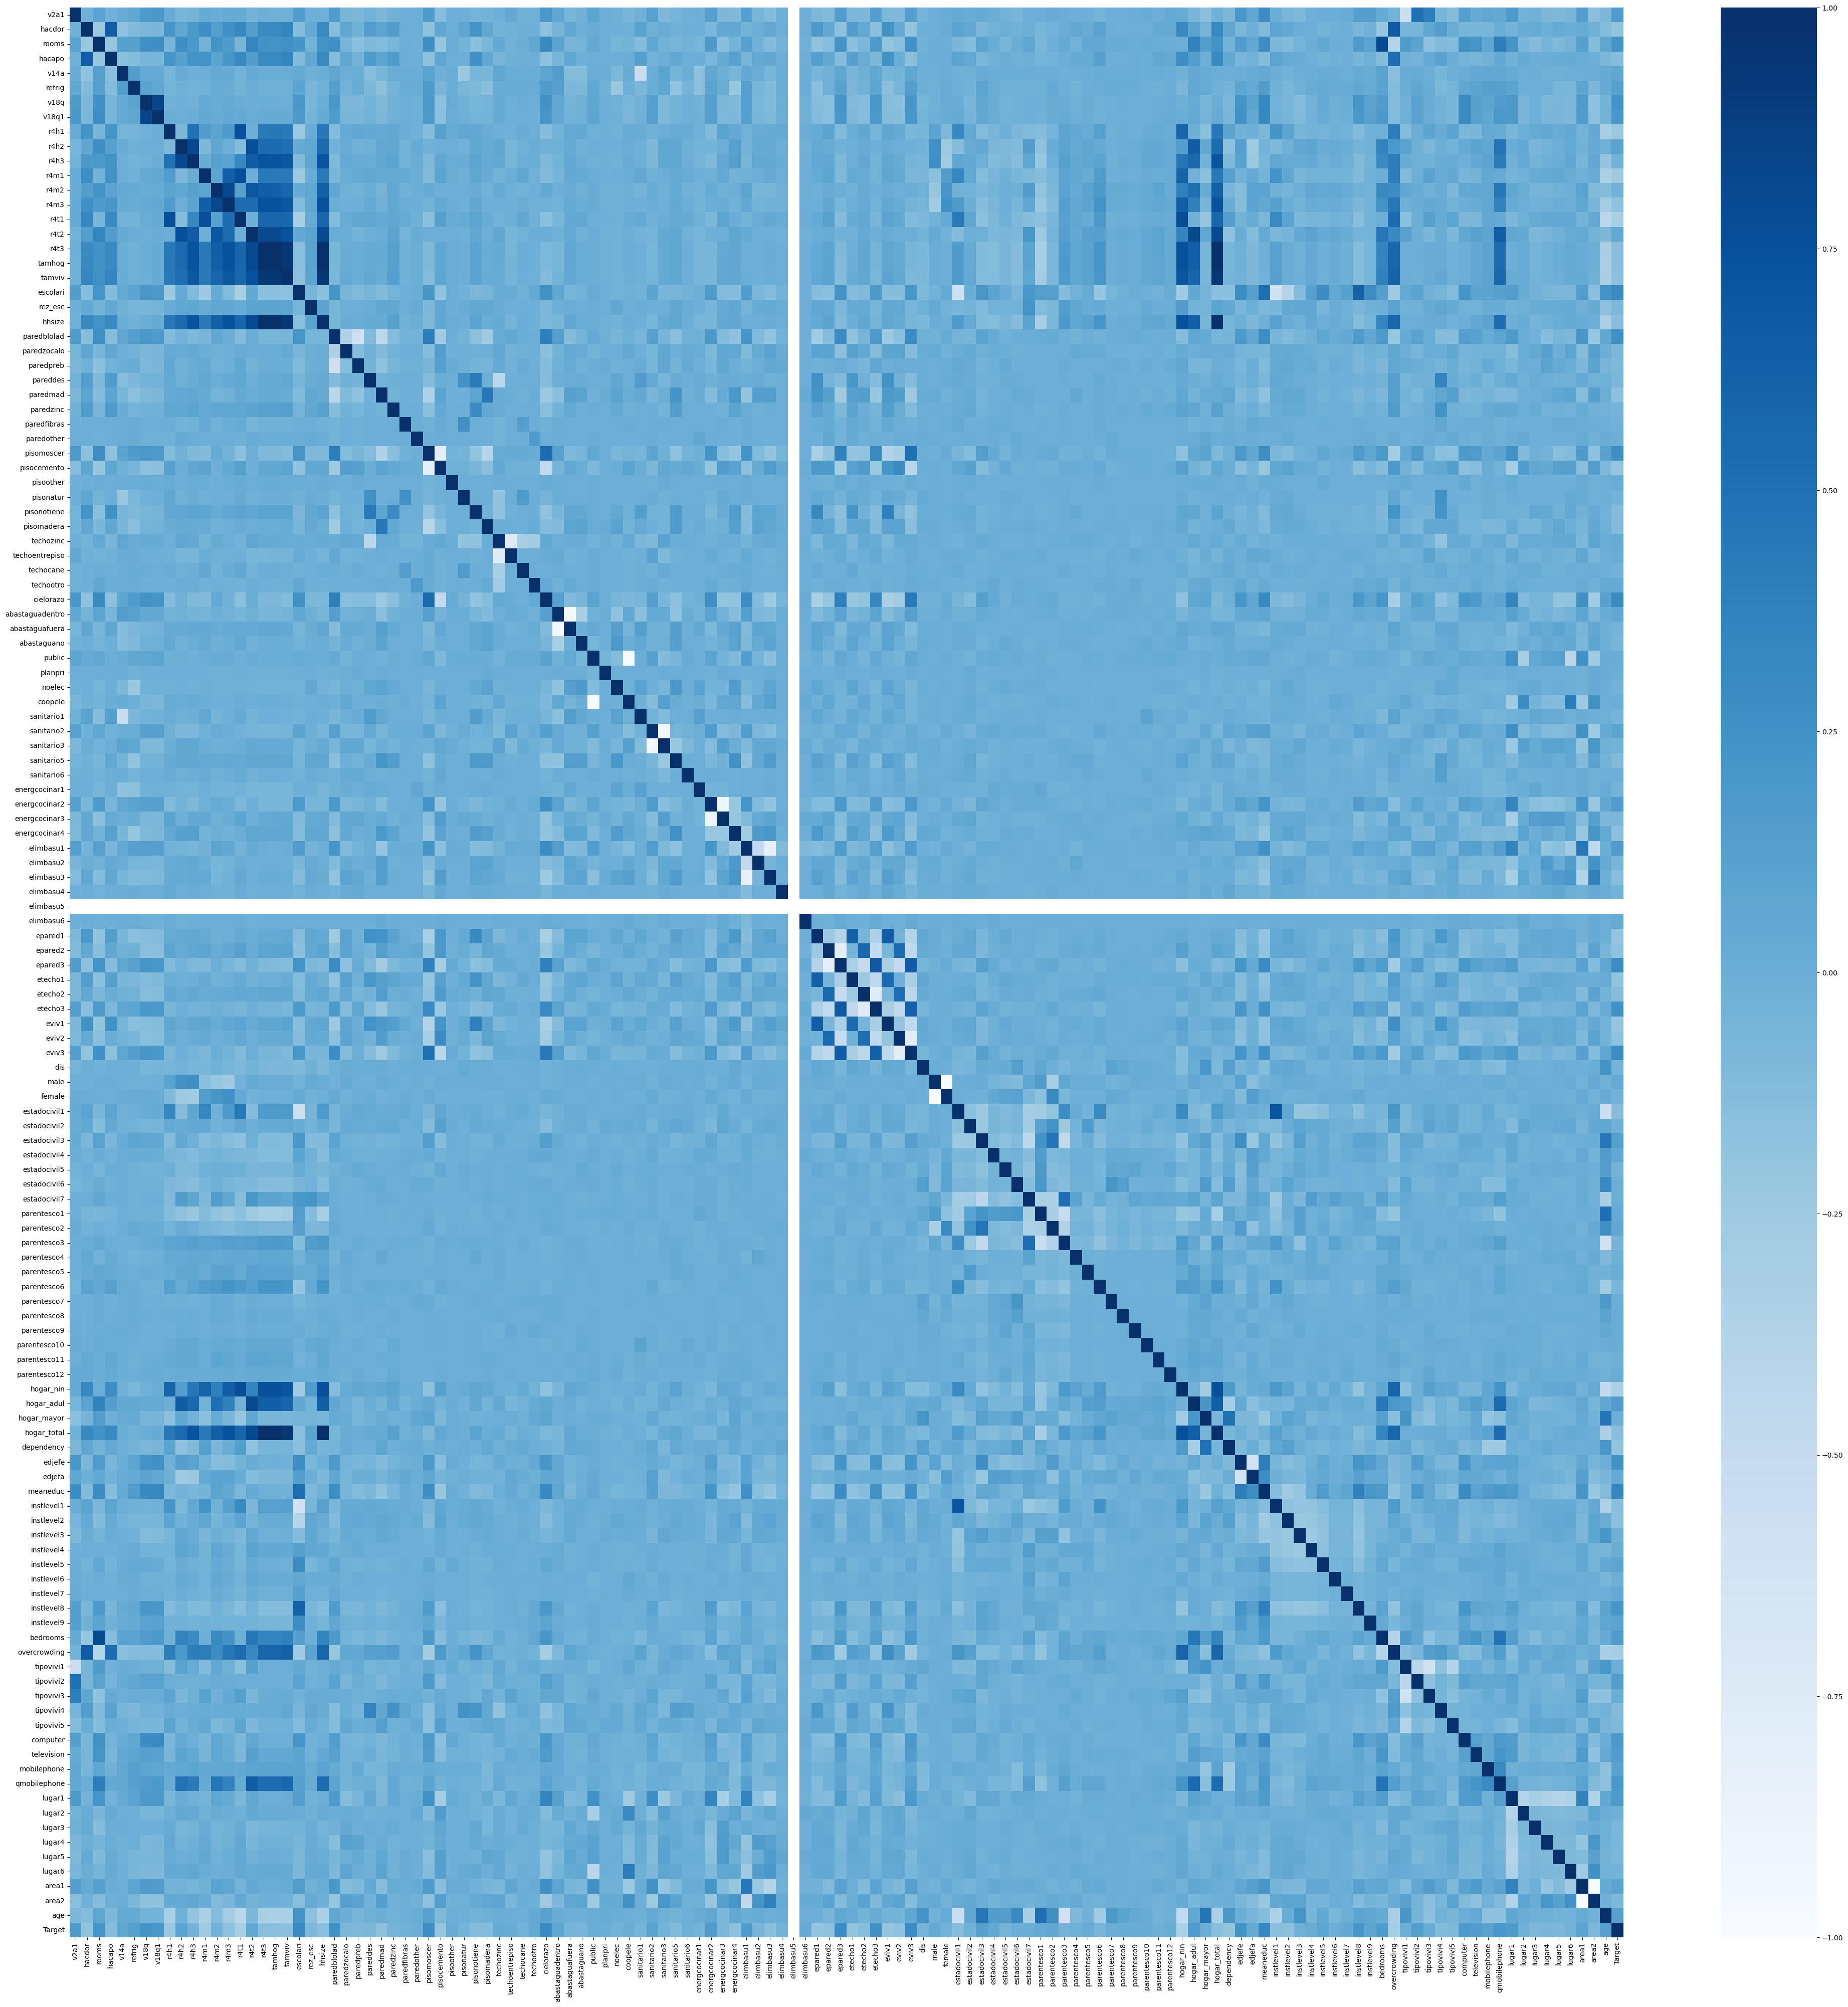

In [51]:
corr_matrix = ds_train.corr()
plt.figure(figsize=(50, 50)) 
sns.heatmap(data= corr_matrix, cmap="Blues")
plt.show()

In [52]:
corr_matrix[(corr_matrix>=0.6)]

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
v2a1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hacdor,NaN,1.000000,NaN,0.652594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.670727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hacapo,NaN,0.652594,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v14a,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...

Here we can see that several of the columns are correlated, either positively or negatively. let's print the columns which has more than more than 95% correlation(positive or negative) to another column. let's skip correlated 1 and -1 that may be for same row and col

In [53]:
corr_matrix=ds_train.corr()
for col in corr_matrix.columns:
    for index, corr_val in corr_matrix[col].items():
        if((corr_val>0.95)&(corr_val !=1) or ((corr_val< (-0.95))&(corr_val!= (-1)))):
            print("\nrow:", index)
            print("column:",col)
            print("correlation level:",corr_val)



row: tamhog
column: r4t3
correlation level: 0.9981074966165092

row: hhsize
column: r4t3
correlation level: 0.9981074966165092

row: hogar_total
column: r4t3
correlation level: 0.9981074966165092

row: r4t3
column: tamhog
correlation level: 0.9981074966165092

row: r4t3
column: hhsize
correlation level: 0.9981074966165092

row: coopele
column: public
correlation level: -0.979823743152294

row: public
column: coopele
correlation level: -0.979823743152294

row: female
column: male
correlation level: -0.9999999999999998

row: male
column: female
correlation level: -0.9999999999999998

row: r4t3
column: hogar_total
correlation level: 0.9981074966165092

row: area2
column: area1
correlation level: -1.0000000000000002

row: area1
column: area2
correlation level: -1.0000000000000002


based on above results it looks like column 'r4t3' is heavily correlated to few other columns 'tamhog', 'hhsize', and 'hogar_total'

ideally if we have correlated columns we dont need to use both of it, in this case we see that 'r4t3' alone should be sufficient for our prediction instead of keeping other 3 columns also

similarly columns "area1" and "area2" are correlated , columns "public" and "coopele" and  negatively correlated, 'male' and 'female' are negatively corrrelated we can remove one of those,

In [54]:
cols=['tamhog','hhsize','hogar_total','coopele','female', 'area2']
ds_train.drop(columns = cols, inplace=True)
ds_test.drop(columns= cols, inplace=True)

we also need to remove the ID based columns now, we cannot apply the data with such information to a model

In [55]:
cols = ['Id','idhogar']
ds_train.drop(columns = cols, inplace=True)
ds_test.drop(columns= cols, inplace = True)
ds_train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamviv,escolari,rez_esc,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age,Target
0,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,10,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,10.0,0.0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,43,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,12,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8.0,12.0,0.0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,67,4
2,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,11,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8.0,0.0,11.0,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,92,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,9,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,1.0,11.0,0.0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,17,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,11,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,1.0,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,37,4


### Predict the poverty level using Random Forest classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [57]:
RF_Classifier = RandomForestClassifier(n_estimators=100, random_state=40)

In [58]:
x_train = ds_train.drop('Target', axis=1)
y_train = ds_train['Target']

x_test = ds_test

Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2',
       ...
       'mobilephone', 'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4',
       'lugar5', 'lugar6', 'area1', 'age'],
      dtype='object', length=125)
Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2',
       ...
       'mobilephone', 'qmobilephone', 'lugar1', 'lugar2', 'lugar3', 'lugar4',
       'lugar5', 'lugar6', 'area1', 'age'],
      dtype='object', length=125)
0    4
1    4
2    4
3    4
4    4
Name: Target, dtype: int64


In [67]:
model = RF_Classifier.fit(x_train, y_train)

In [60]:
ds_test.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamviv,escolari,rez_esc,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age
0,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,0,0.5,0.0,17.0,16.500000,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,4
1,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,16,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0.5,0.0,17.0,16.500000,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,41
2,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,17,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0.5,0.0,17.0,16.500000,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,41
3,0.0,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,16,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,16.0,0.0,16.000000,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,59
4,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,11,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8.0,0.0,11.0,9.157474,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,18


In [61]:
ds_test.shape

(23856, 125)

In [63]:
test_data_y_pred = RF_Classifier.predict(ds_test)
train_data_y_pred = RF_Classifier.predict(x_train)

In [64]:
accuracy = accuracy_score(y_train, train_data_y_pred)
print(f"Training Accuracy: {accuracy:.2f}")

Training Accuracy: 1.00


In [65]:
from sklearn.metrics import  classification_report
class_report = classification_report(y_train, train_data_y_pred)
print("Training Classification Report:\n", class_report)

Training Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       755
           2       1.00      1.00      1.00      1597
           3       1.00      1.00      1.00      1209
           4       1.00      1.00      1.00      5996

    accuracy                           1.00      9557
   macro avg       1.00      1.00      1.00      9557
weighted avg       1.00      1.00      1.00      9557



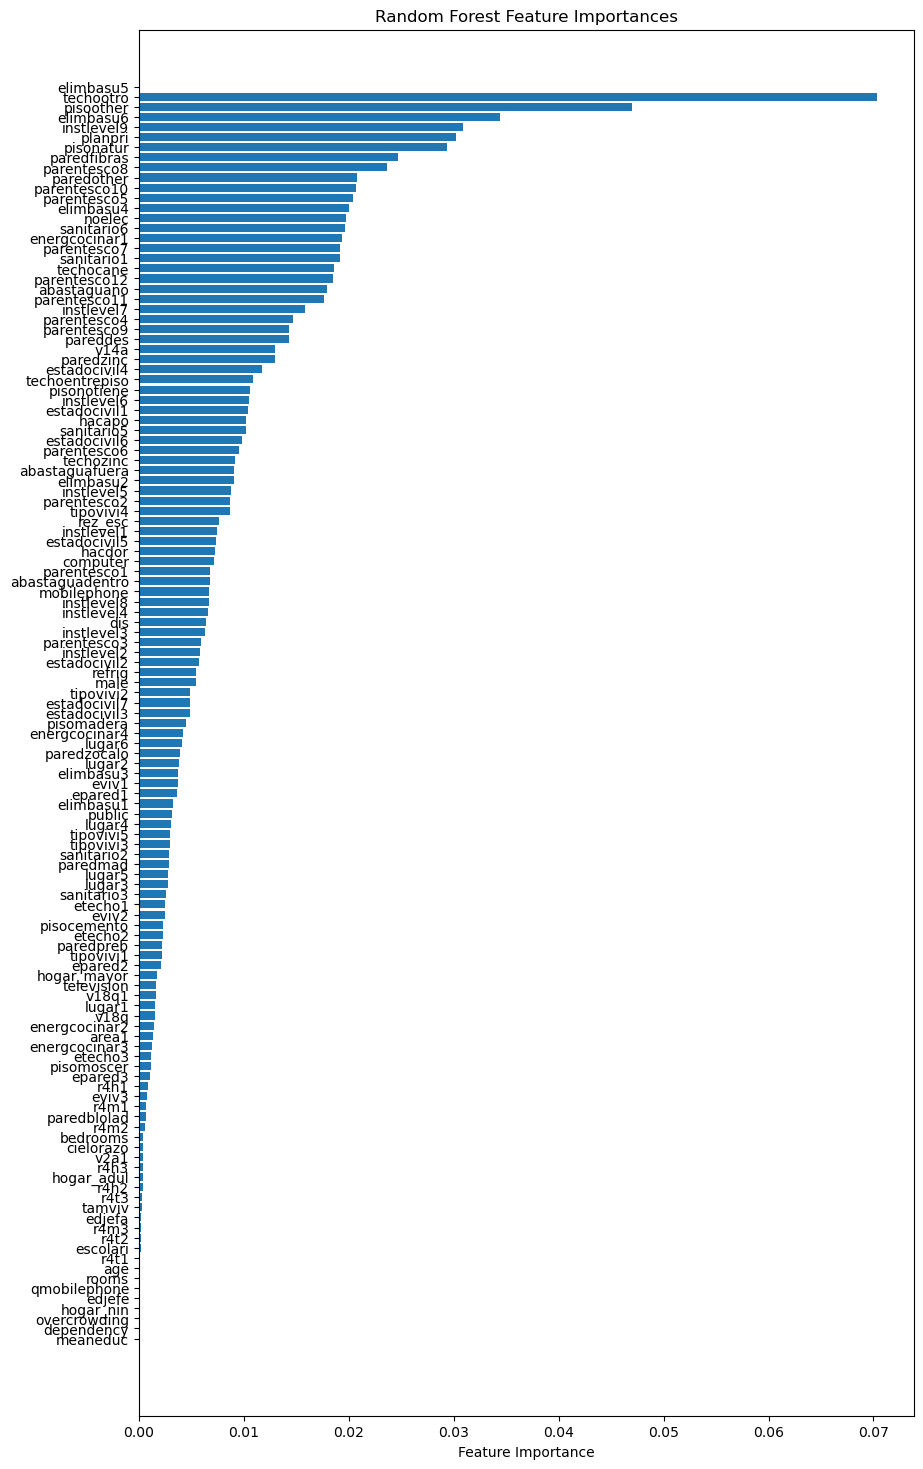

In [66]:
# Optionally, plot feature importances if RandomForest supports it
if hasattr(RF_Classifier, 'feature_importances_'):
    feature_importances = RF_Classifier.feature_importances_
    feature_names = x_train.columns
    sorted_idx = feature_importances.argsort()

    # Plot feature importances
    plt.figure(figsize=(10, 18))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx), 0, -1), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title('Random Forest Feature Importances')
    plt.show()

In [81]:
print("prediction",train_data_y_pred)

prediction [4 4 4 ... 2 2 2]


Let's run the model for cross validation accuracy as well

In [98]:
modelcv = RandomForestClassifier(n_estimators=200, random_state=40)

In [103]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelcv,x_train , y_train, cv=10, scoring='accuracy')

In [104]:
for fold, score in enumerate(scores, start=1):
    print(f"Fold {fold} Acuracy:{score:.3f}")
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")

Fold 1 Acuracy:0.667
Fold 2 Acuracy:0.675
Fold 3 Acuracy:0.662
Fold 4 Acuracy:0.643
Fold 5 Acuracy:0.655
Fold 6 Acuracy:0.672
Fold 7 Acuracy:0.593
Fold 8 Acuracy:0.534
Fold 9 Acuracy:0.558
Fold 10 Acuracy:0.622
Mean Accuracy: 0.63
Standard Deviation: 0.05
